# Import necessary depencencies

In [2]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu
import nltk
import textblob

np.set_printoptions(precision=2, linewidth=80)

# Load normalized data

In [3]:
df = pd.read_csv('fb_ads.csv')
df=df[df['normtext'].notna()]
df
corpus = np.array(df['normtext'])


In [4]:
#get list of candidates: overall and by party
can=df.page_name.unique()
dem = df[df['party']=="D"]
rep = df[df['party']=="R"]
dem_can=dem.page_name.unique()
rep_can=rep.page_name.unique()

# Sentiment Analysis with AFINN

In [5]:
from afinn import Afinn

afn = Afinn(emoticons=True) 

## Predict sentiment

In [6]:
#initialize indexes
pos_index = []
neg_index = []


In [7]:

pos = 0
neg = 0
score=[]
for ad in corpus:
    score.append(afn.score(ad))


In [8]:
df['score']=score
df[df['page_name']=='Patty Murray'].mean()


C:\Users\13108\AppData\Local\Temp\ipykernel_12436\1550624869.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['page_name']=='Patty Murray'].mean()


score    3.356913
dtype: float64

## Plot results

<AxesSubplot:>

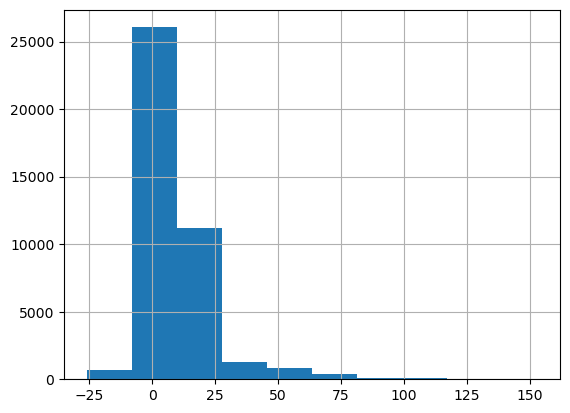

In [9]:
#Histogram average sentiment score (all candidates)
df['score'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

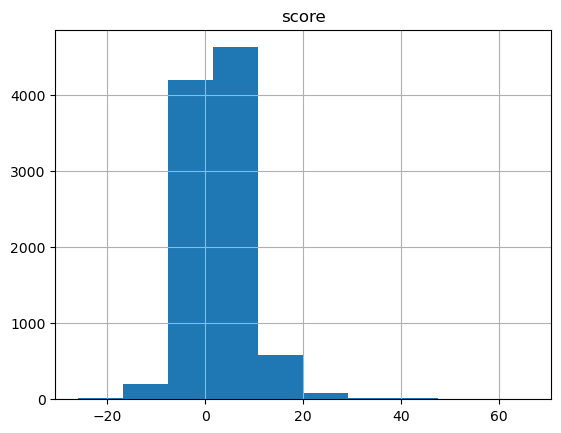

In [14]:
#plot scores for all Republicans
df[df['party']=='R'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

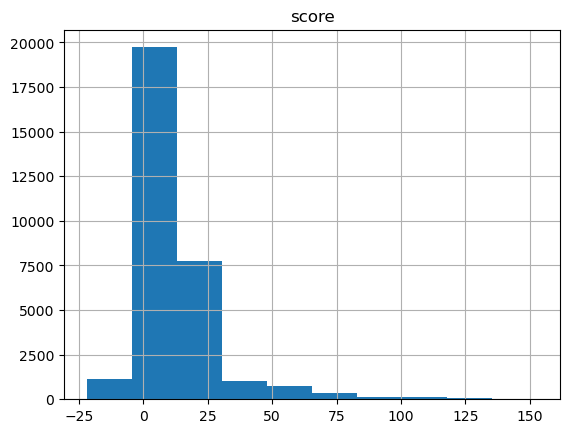

In [15]:
#plot scores for all Democrats
df[df['party']=='D'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

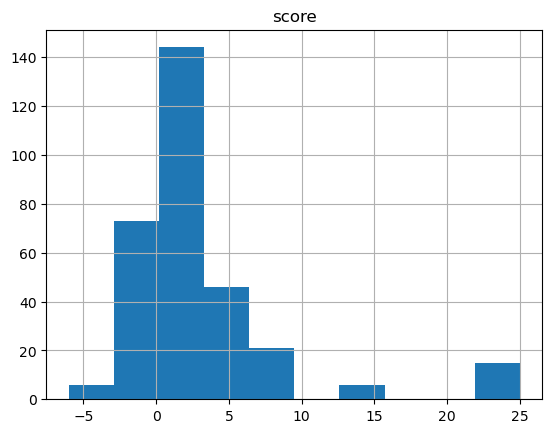

In [10]:
#Histogram for Patty Murray's (Democrat) avg ad sentiment
df[df['page_name']=='Patty Murray'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

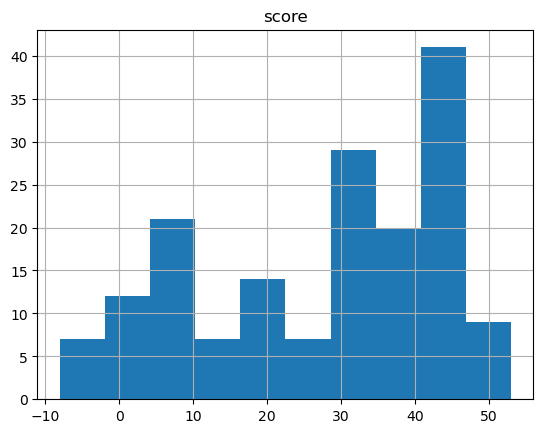

In [11]:
#Histogram for Alex Padilla's (Democrat) avg ad sentiment
df[df['page_name']=='Alex Padilla'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

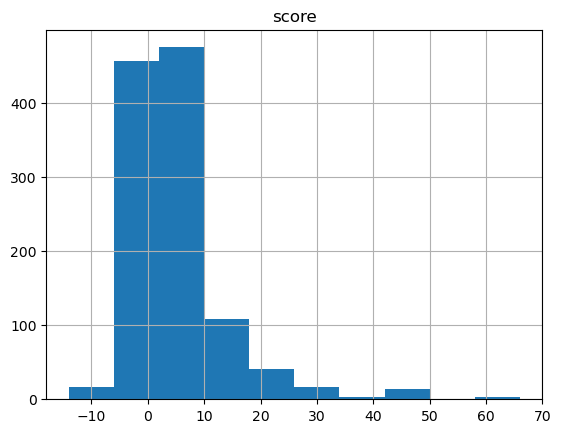

In [12]:
#Histogram for Marco Rubios's (Republican) avg ad sentiment
df[df['page_name']=='Marco Rubio'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

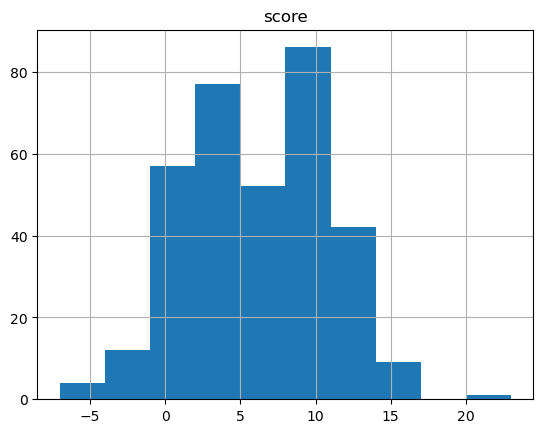

In [13]:
#Histogram for Tim Scott's (Republican) avg ad sentiment
df[df['page_name']=='Tim Scott'].hist()